# Подготовка данных на примере задачи распознавания цифр

Загрузка датасета

In [1]:

# from torchvision.datasets import MNIST

# train_data = MNIST(root='./data', train=True, download=True, transform=None)
# test_data  = MNIST(root='./data', train=False, download=True, transform=None)

# from torchvision.datasets import MNIST

# train_data = MNIST(root='./data', train=True, download=False, transform=None)
# test_data  = MNIST(root='./data', train=False, download=False, transform=None)

from torchvision.datasets import MNIST
train_data = MNIST(root='./data', train=True, download=True, transform=None)
test_data  = MNIST(root='./data', train=False, download=True, transform=None)

# from torchvision.datasets import FashionMNIST

# train_data = FashionMNIST(root='./data', train=True, download=True, transform=None)
# test_data  = FashionMNIST(root='./data', train=False, download=True, transform=None)

train_data, test_data

100%|██████████| 9.91M/9.91M [00:05<00:00, 1.97MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 234kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.11MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train,
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test)

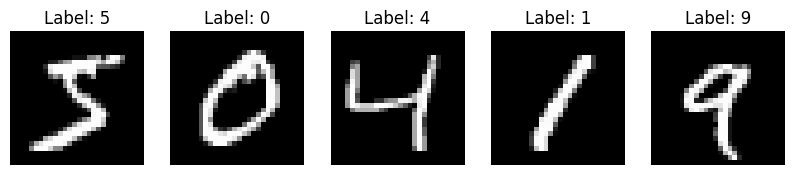

In [2]:
# Блок кода отвечающий за визуализацию, его редактировать не надо.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axes):
    img, label = train_data[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

## Задание 1. Загрузка с одновременной трансформацией

100%|██████████| 26.4M/26.4M [00:06<00:00, 4.02MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 838kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.33MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


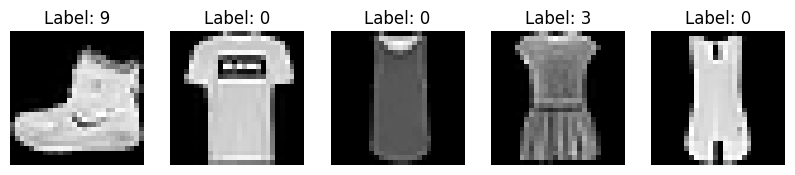

In [3]:

import matplotlib.pyplot as plt
import torchvision.transforms as transforms
# from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

transform = transforms.Compose([
    transforms.ToTensor(),                     # из [0,255] в [0,1]
    transforms.Normalize((0.1307,), (0.3081,)) # нормализация (mean=0.1307,std=0.3081)
    # Значения вычислены по всему тренировочному набору MNIST и помогают привести данные к нулевому среднему и единичному стандартному отклонению, что ускоряет и стабилизирует обучение.
])

# Загружаем тренировочные и тестовые данные
train_data = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = FashionMNIST(root='./data', train=False, download=True, transform=transform)


# Блок кода отвечающий за визуализацию, его редактировать не надо.
fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axes):
    img, label = train_data[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

## Задание 2

1. Разбейте данные на тренировочную и валидационную выборки.
1. Создайте загрузчики данных (DataLoader) для пакетной подачи в модель с размером батча 64. 
+ Для тренировки перемешайте данные с помощью параметра shuffle=True.
+ Для валидации оставьте данные как есть.
  DataLoader оборачивает Dataset и позволит итерироваться по мини‑батчам с помощью next(iter(train_loader)).
3. Возьмите первый батч из train-выборки и выведите тензоры изображений и соответствующих меток.

images.shape: torch.Size([64, 1, 28, 28])
labels.shape: torch.Size([64])
Метка первого изображения в батче: 5


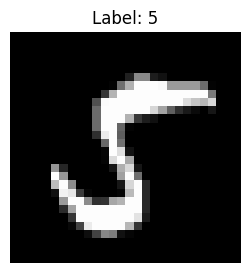

In [ ]:

from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
# from torchvision.datasets import FashionMNIST

# Определяем преобразования
transform = transforms.Compose([
    transforms.ToTensor(),                     # из [0,255] в [0,1]
    transforms.Normalize((0.1307,), (0.3081,)) # нормализация (mean=0.1307,std=0.3081)
])

# Загружаем данные MNIST
train_data = MNIST(root='./data', train=True, download=False, transform=transform)
test_data  = MNIST(root='./data', train=False, download=False, transform=transform)
# train_data = FashionMNIST(root='./data', train=True, download=False, transform=transform)
# test_data  = FashionMNIST(root='./data', train=False, download=False, transform=transform)

# Разделяем данные на тренировочную и валидационную выборки
train_size = int(0.8 * len(train_data))
val_size   = len(train_data) - train_size

train_data, val_data = random_split(train_data, [train_size, val_size])

# Создаем загрузчики данных
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=64, shuffle=False)


# Получаем первый батч из train-выборки
images, labels = next(iter(train_loader))


# Печатаем формы тензоров
print("images.shape:", images.shape)   # torch.Size([64, 1, 28, 28])
print("labels.shape:", labels.shape)   # torch.Size([64])


# Выведем метку первого изображения
first_label = labels[0].item()
print("Метка первого изображения в батче:", first_label)


# Отобразим само первое изображение
plt.figure(figsize=(3,3))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

# Продвинутые приёмы построения MLP на PyTorch

## Задание 1

1. Определите модель через nn.Sequential.
1. Прогоните один батч через модель и проверьте форму выхода.
1. Обучите модель на этом батче:
+ Определите optimizer c lr = 0.01 и criterion = nn.CrossEntropyLoss().
+ Выполните прямой проход, посчитайте loss.
+ Выведите форму выхода и значение loss.

In [2]:

import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import MNIST


# Готовим данные
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


# Подготовка данных из прошлого урока
dataset = MNIST(root='./data', train=True, download=False, transform=transform)
train_size = int(0.8 * len(dataset))
val_size   = len(dataset) - train_size

train_data, val_data = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_data,   batch_size=64, shuffle=False)
images, labels = next(iter(train_loader))

# Определяем модель через nn.Sequential
model_seq = nn.Sequential(
    nn.Flatten(),          # Разворачиваем изображение 1×28×28 → 784
    nn.Linear(784, 256),  # Полносвязный слой с 256 нейронами
    nn.ReLU(),            # Активация ReLU
    nn.Linear(256, 128),  # Полносвязный слой с 128 нейронами
    nn.ReLU(),            # Активация ReLU
    nn.Linear(128, 10)    # Полносвязный слой на 10 классов (цифры от 0 до 9)
)


# Прогон и обучение одного батча
out_seq = model_seq(images)
print("Output shape:", out_seq.shape)   # ожидаем [64, 10]


# Оптимизатор и функция потерь
optimizer = torch.optim.SGD(model_seq.parameters(), lr=0.01)  # Оптимизатор SGD
criterion = nn.CrossEntropyLoss()  # Функция потерь

# Прямой проход
loss = criterion(out_seq, labels)  # Вычисляем потерю
optimizer.zero_grad()               # Обнуляем градиенты
loss.backward()                     # Обратное распространение
optimizer.step() 


print("Loss после одного шага:", loss.item())

Output shape: torch.Size([64, 10])
Loss после одного шага: 2.3357880115509033


## Задание 2

1. Дополните класс по архитектуре:
+ Linear(784→256) → BatchNorm1d(256) → ReLU → Dropout(0.5)
+ Linear(256→128) → ReLU
+ Linear(128→10)
+ Инициализировать все Linear-слои методом Xavier (xavier_uniform_).
2. Возьмите один батч из train‑лоадера и прогоните его через модель (сделайте прямой проход).

In [3]:

import torch
import torch.nn as nn
import torch.nn.init as init
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader


# Реализация класса
class AdvancedMNISTMLP(nn.Module):
    def __init__(self):
        super().__init__()
        #   Определите слои:
        #   Linear(784→256), BatchNorm1d(256), ReLU, Dropout(0.5), 
        #   Linear(256→128), ReLU, Linear(128→10)
        self.linear1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, 10)
        
        # Инициализация весов слоёв Linear
        init.xavier_uniform_(self.linear1.weight)
        init.xavier_uniform_(self.linear2.weight)
        init.xavier_uniform_(self.linear3.weight)
        # Смещения (bias) по умолчанию инициализируются нулями


    def forward(self, x):
        # Разворачиваем изображение (batch,1,28,28) → (batch,784)
        x = x.view(x.size(0), -1)  # разворачиваем изображение
        x = self.linear1(x)
        x = self.bn1(x)             # нормируем
        x = self.relu(x)
        x = self.dropout(x)         # регуляризация
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x


# Загрузка данных и DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)


# Один батч и прямой проход
model = AdvancedMNISTMLP()


images, labels = next(iter(train_loader))


outputs = model(images)


# Вывод результатов
print("Output shape:", outputs.shape)      # ожидаем [64, 10]
print("Batch labels shape:", labels.shape) # [64]

Output shape: torch.Size([64, 10])
Batch labels shape: torch.Size([64])


## Задание 3

Сделайте более простую реализацию — через через контейнер nn.Sequential.

Ваша задача — реализовать класс AdvancedMNISTMLPSeq, который:

1. Использует контейнер nn.Sequential для сборки таких блоков:
+ Flatten — разворачивание входа (batch, 1, 28, 28) → (batch, 784);
+ Linear(784 → 256), BatchNorm1d(256), ReLU, Dropout(p=0.5);
+ Linear(256 → 128), ReLU;
+ Linear(128 → 10).
2. В конструкторе инициализирует все Linear‑слои методом Xavier (xavier_uniform_), а их bias обнуляет.
3. В forward вызывает self.net(x), позволяя Sequential пройти по всем модулям.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Класс через Sequential
class AdvancedMNISTMLPSeq(nn.Module):
    def __init__(self):
        super().__init__()
        # Составьте nn.Sequential так, чтобы в нём были:
        #   Flatten,
        #   Linear(784→256), BatchNorm1d(256), ReLU, Dropout(0.5),
        #   Linear(256→128), ReLU,
        #   Linear(128→10)
        self.net = nn.Sequential(
            nn.Flatten(),  # Разворачиваем вход (batch, 1, 28, 28) → (batch, 784)
            nn.Linear(784, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        
        # Инициализация всех Linear-слоев Xavier’ом
        for layer in self.net:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)  # Обнуляем смещения


    def forward(self, x):
        return self.net(x)

# Загрузка данных и DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Один батч и прямой проход
model = AdvancedMNISTMLPSeq()

images, labels = next(iter(train_loader))

outputs = model(images)

# Прогон одного батча
model = AdvancedMNISTMLPSeq()
images, labels = next(iter(train_loader))
outputs = model(images)
print("Output shape:", outputs.shape)  # [64,10]
print("Batch labels shape:", labels.shape) # [64]

Output shape: torch.Size([64, 10])
Batch labels shape: torch.Size([64])


## Задание 4

Теперь ваша задача — реализовать класс AdvancedMNISTMLPList, который:

1. Использует контейнер nn.ModuleList для хранения блоков:
+ Linear(784 → 256), BatchNorm1d(256), ReLU, Dropout(p=0.5);
+ Linear(256 → 128), ReLU;
+ Linear(128 → 10).
2. Добавляет отдельный nn.Flatten() в __init__ для разворачивания входа (batch, 1, 28, 28) → (batch, 784).
3. В конструкторе инициализирует все Linear‑слои методом Xavier (xavier_uniform_), а их bias обнуляет.
4. В forward сначала разворачивает вход, затем вручную последовательно применяет каждый слой из ModuleList.

In [5]:

import torch
import torch.nn as nn
import torch.nn.init as init
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST


# Класс через ModuleList

class AdvancedMNISTMLPList(nn.Module):
    def __init__(self):
        super().__init__()
        # Используйте nn.Flatten() + nn.ModuleList для:
        #   Linear(784→256), BatchNorm1d(256), ReLU, Dropout(0.5),
        #   Linear(256→128), ReLU,
        #   Linear(128→10)
        self.flatten = nn.Flatten()
        self.layers = nn.ModuleList([
            nn.Linear(784, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        ])
        
        # Инициализация всех Linear-слоев Xavier’ем
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)  # Обнуляем смещения


    def forward(self, x):
        x = self.flatten(x)
        # Пройдите по self.layers по порядку и примените каждый модуль
        for layer in self.layers:
            x = layer(x)
        return x


# Загрузка данных и DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_data = MNIST(root='./data', train=True, download=False, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)




# Один батч и прямой проход
model = AdvancedMNISTMLPList()


images, labels = next(iter(train_loader))


outputs = model(images)


# Вывод результатов
print("Output shape:", outputs.shape)      # ожидаем [64, 10]
print("Batch labels shape:", labels.shape) # [64]

Output shape: torch.Size([64, 10])
Batch labels shape: torch.Size([64])


# Сохранение модели и инференс на новых данных

Сохранение полной модели

In [7]:

torch.save(model, './model/full_model.pth')
load_model = torch.load('./model/full_model.pth', weights_only=False) # Указываем, что не загружаем только веса
load_model

AdvancedMNISTMLPList(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

## Задание 1

+ Выполните загрузку полного объекта модели из full_model.pth. Переведите его в eval().
+ Возьмите несколько случайных изображений из тестового набора и сделайте предсказание загруженной моделью. Сравните результаты с истинными метками.
+ Напишите функцию, которая на вход принимает тензор image_tensor размером [1, 28, 28] и возвращает предсказанный класс. Функция должна использовать torch.no_grad().
+ Запустите и проверьте predict на первом изображении первого батча.

In [9]:


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# Подготовка данных MNIST

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=False, transform=transform)
val_dataset   = datasets.MNIST(root='./data', train=False, download=False, transform=transform)
train_loader  = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader    = DataLoader(val_dataset, batch_size=1000, shuffle=False)


# Загрузка модели 
load_model = torch.load('./model/full_model.pth', weights_only=False)


# Перевод модели в режим инференса
load_model.eval()


def predict(image_tensor: torch.Tensor) -> int:
    if image_tensor.ndim == 3:
        image_tensor = image_tensor.unsqueeze(0)
    with torch.no_grad():
        outputs = load_model(image_tensor)
        pred = outputs.argmax(dim=1).item()
    return pred


# Берём один батч из валидации
images, labels = next(iter(val_loader))


# Выбираем первый образец из батча
sample_img   = images[0]   # форма [1,28,28]
sample_label = labels[0].item()


print("Реальный класс:", sample_label)
print("Предсказанный класс:", predict(sample_img))

Реальный класс: 7
Предсказанный класс: 3


# Практика. Обучение MLP: функция потерь, цикл обучения

Инициализируем модель и загружаем данные 

In [ ]:
# Инициализируем модель
model = AdvancedMNISTMLPList()


# Загружаем данные MNIST (тренировочный и тестовый набор)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=False, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=False, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=1000, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x186f49d33b0>,
 <torch.utils.data.dataloader.DataLoader at 0x186f4a7f530>)

Настраиваем модель

In [11]:
# Инициализируем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Настраиваем подключение к ClearML

In [14]:
import os
from dotenv import load_dotenv
from clearml import Task
from clearml import Dataset

# Загрузка переменных окружения из файла .env
load_dotenv()

Task.set_credentials(
    api_host=os.getenv('CLEARML_API_HOST'),
    web_host=os.getenv('CLEARML_WEB_HOST'),
    files_host=os.getenv('CLEARML_FILES_HOST'),
    key=os.getenv('CLEARML_API_ACCESS_KEY'),
    secret=os.getenv('CLEARML_API_SECRET_KEY')
)

In [15]:
# Инициализируем задачу (Task) в ClearML
task = Task.init(project_name="SimpleNN Project", task_name="Experiment #1")
task

ClearML Task: created new task id=30eb45f0e09e4804814de1e6aec09664
ClearML results page: https://app.clear.ml/projects/2dc955db01d24082b4d83b5802578449/experiments/30eb45f0e09e4804814de1e6aec09664/output/log


ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


Реализуем основной цикл обучения

In [16]:
from clearml import Logger  # Для логирования метрик


# Цикл обучения
num_epochs = 10

train_losses = []
train_accuracies = []


for epoch in range(num_epochs):
    model.train()  # перевод модели в режим обучения
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Проход по всем батчам трен.набора
    for images, labels in train_loader:


        # Прямой проход
        outputs = model(images)             # выходы - логиты [batch, 10]
        loss = criterion(outputs, labels)   # вычисляем потерю


        # Обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        # Накопление статистики для метрик
        running_loss += loss.item()         # суммируем loss
        _, predicted = outputs.max(1)       # индекс максимальной логиты = предсказанный класс
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()


    # Средние значения по эпохе
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100.0 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)


    # Выводим информацию по эпохе
    print(f'Epoch {epoch+1}/{num_epochs} — Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
    
    # Отправляем метрики в ClearML
    Logger.current_logger().report_scalar("train", "loss", iteration=epoch, value=epoch_loss)
    Logger.current_logger().report_scalar("train", "accuracy", iteration=epoch, value=epoch_acc)

Epoch 1/10 — Loss: 0.1837, Accuracy: 94.41%
Epoch 2/10 — Loss: 0.1524, Accuracy: 95.30%
Epoch 3/10 — Loss: 0.1330, Accuracy: 95.78%
Epoch 4/10 — Loss: 0.1174, Accuracy: 96.31%
Epoch 5/10 — Loss: 0.1082, Accuracy: 96.52%
Epoch 6/10 — Loss: 0.0982, Accuracy: 96.92%
Epoch 7/10 — Loss: 0.0934, Accuracy: 97.10%
Epoch 8/10 — Loss: 0.0866, Accuracy: 97.24%
Epoch 9/10 — Loss: 0.0829, Accuracy: 97.31%
Epoch 10/10 — Loss: 0.0755, Accuracy: 97.51%


Оценка модели

In [17]:
# Оценка на тестовом наборе и матрица ошибок
model.eval()  # режим оценки
test_loss = 0.0

correct = 0

total = 0

all_preds = []
all_labels = []


with torch.no_grad():
    for images, labels in test_loader:


        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


test_loss = test_loss / len(test_loader)
test_accuracy = 100.0 * correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.0588, Test Accuracy: 98.05%


Строим графики

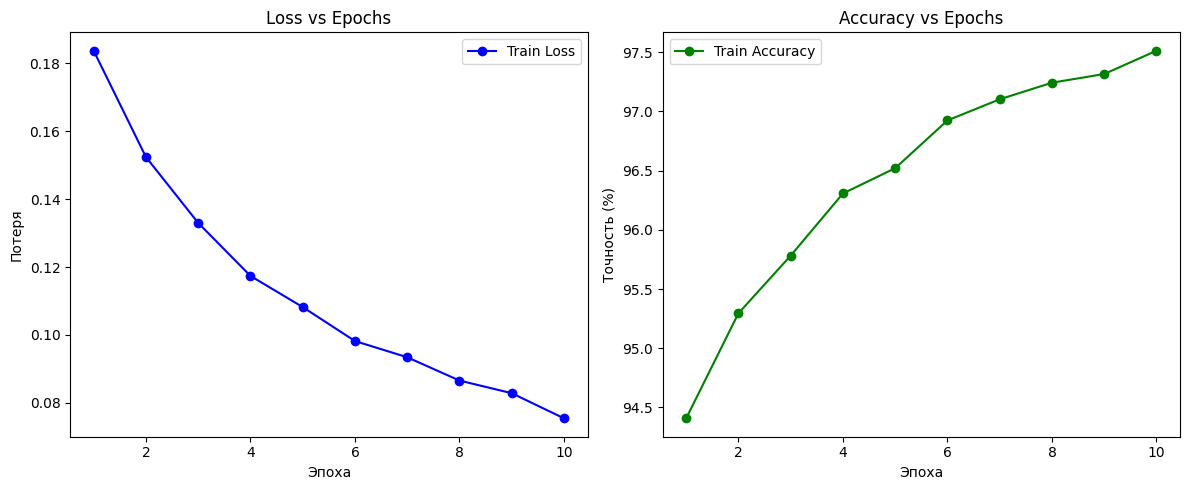

In [18]:
# Построение графиков потерь и точности
import matplotlib.pyplot as plt


epochs = range(1, num_epochs+1)
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', color='blue', label='Train Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, marker='o', color='green', label='Train Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Эпоха')
plt.ylabel('Точность (%)')
plt.legend()


plt.tight_layout()
plt.show()

# Задание

**Формат задания**

Выполните задание локально на своём устройстве: скопируйте код ниже, реализуйте шаги и проанализируйте результаты. 

Проверить задание вы сможете самостоятельно. В конце выполнения нажмите кнопку «Готово» и увидите авторское решение — с ним вы можете сверить свой вариант. 

**Что нужно сделать**

Реализуйте и протестируйте свой собственный цикл обучения. Выполните такие шаги:

1. Импортируйте библиотеки: torch, torchvision, matplotlib, clearml — и нужные модули.
1. Реализуйте модель AdvancedMNISTMLPList, определённую в предыдущем уроке.
1. Подготовьте данные: используйте torchvision.datasets.MNIST с DataLoader для обучающего и тестового наборов.
1. Определите функцию потерь и оптимизатор: criterion = nn.CrossEntropyLoss(), optimizer = optim.Adam(...). Задайте подходящую скорость обучения (например, lr=0.001).
1. Настройте подключение ClearML: вызовите Task.set_credentials(...) со своими данными, затем Task.init(project_name, task_name).
1. Реализуйте цикл обучения в 5 эпох:
+ Для каждой эпохи сбрасывайте метрику и собирайте новые значения loss и точности.
+ Внутри цикла для каждого батча проводите прямой и обратный проход, обновление оптимизатором.
+ После каждой эпохи вычисляйте среднюю потерю и точность на обучающем наборе.
+ Выводите результат в консоль и отправляйте в ClearML (с помощью Logger.current_logger().report_scalar).
7. Оцените модель на тестовом наборе после завершения обучения: вычислите test_loss и test_accuracy.
8. Постройте графики потерь и точности по эпохам с помощью matplotlib. Сохраните или отобразите их. Убедитесь, что после обучения сохраняете значения epoch_loss и epoch_acc в списки для отрисовки графиков.

In [7]:
import os
from dotenv import load_dotenv

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from clearml import Task, Logger

In [2]:
# Определяем модель AdvancedMNISTMLPList (с прошлого урока)
class AdvancedMNISTMLPList(nn.Module):
    def __init__(self):
        super(AdvancedMNISTMLPList, self).__init__()
        self.layers = nn.ModuleList([
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        ])
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # раскладываем картинку в вектор
        for layer in self.layers:
            x = layer(x)
        return x

In [3]:
# Инициализируем модель
model = AdvancedMNISTMLPList()
model

AdvancedMNISTMLPList(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Загружаем данные MNIST (тренировочный и тестовый набор)
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=1000, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x15c02c01010>,
 <torch.utils.data.dataloader.DataLoader at 0x15c301d5b50>)

In [6]:
# Инициализируем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Подключение к ClearML
load_dotenv()

Task.set_credentials(
    api_host=os.getenv('CLEARML_API_HOST'),
    web_host=os.getenv('CLEARML_WEB_HOST'),
    files_host=os.getenv('CLEARML_FILES_HOST'),
    key=os.getenv('CLEARML_API_ACCESS_KEY'),
    secret=os.getenv('CLEARML_API_SECRET_KEY')
)
task = Task.init(project_name='MNIST_Project', task_name='MLP_Train')
task

ClearML Task: created new task id=1ea08e9abb754f1ab9395d55a19418f7
ClearML results page: https://app.clear.ml/projects/318080aa40ee4ef8b4f24822fc250735/experiments/1ea08e9abb754f1ab9395d55a19418f7/output/log


ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


In [9]:
# Цикл обучения
num_epochs = 5
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()  # перевод модели в режим обучения
    running_loss = 0.0
    correct = 0
    total = 0

    # Проход по всем батчам трен.набора
    for images, labels in train_loader:
        # Прямой проход
        outputs = model(images)  # выходы - логиты [batch, 10]
        loss = criterion(outputs, labels)  # вычисляем потерю

        # Обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Накопление статистики для метрик
        running_loss += loss.item()  # суммируем loss
        _, predicted = outputs.max(1)  # индекс максимальной логиты = предсказанный класс
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Средние значения по эпохе
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100.0 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Выводим информацию по эпохе
    print(f'Epoch {epoch+1}/{num_epochs} — Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
    
    # Отправляем метрики в ClearML
    Logger.current_logger().report_scalar("train", "loss", iteration=epoch, value=epoch_loss)
    Logger.current_logger().report_scalar("train", "accuracy", iteration=epoch, value=epoch_acc)

Epoch 1/5 — Loss: 0.3289, Accuracy: 90.78%
Epoch 2/5 — Loss: 0.1352, Accuracy: 96.02%
Epoch 3/5 — Loss: 0.0942, Accuracy: 97.10%
Epoch 4/5 — Loss: 0.0705, Accuracy: 97.86%
Epoch 5/5 — Loss: 0.0571, Accuracy: 98.23%


In [10]:
# Оценка на тестовом наборе
model.eval()  # режим оценки
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader)
test_accuracy = 100.0 * correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.0742, Test Accuracy: 97.72%


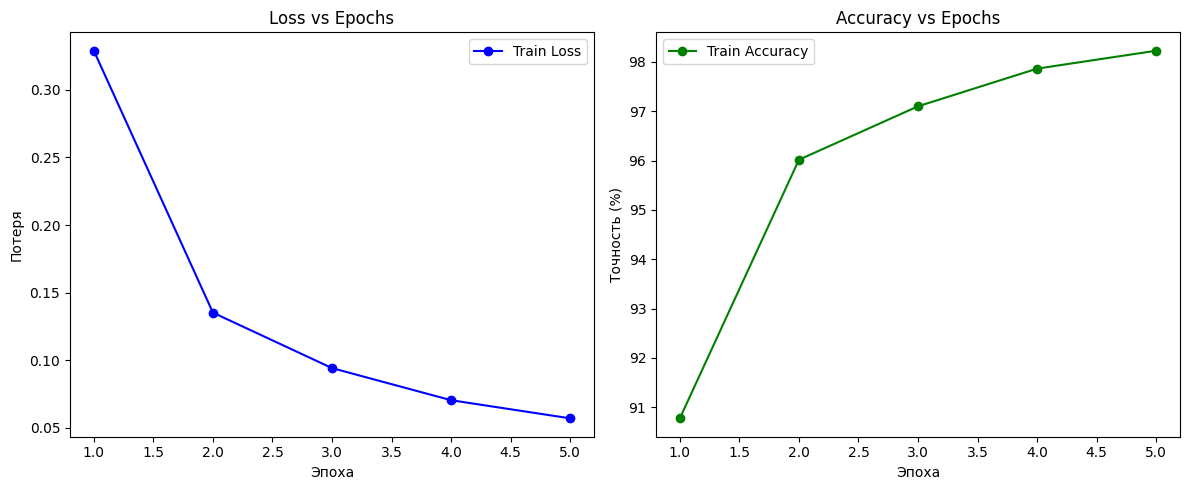

In [11]:
# Построение графиков потерь и точности
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', color='blue', label='Train Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, marker='o', color='green', label='Train Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Эпоха')
plt.ylabel('Точность (%)')
plt.legend()

plt.tight_layout()
plt.show()